# Đặt câu hỏi

Notebook này thực hiện việc phân tích và đặt câu hỏi, visualization.

## Import các thư viện cần thiết

In [59]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Đọc file dữ liệu

Dữ liệu của chúng ta được lưu trong file 'Anime.csv'. Chúng ta sẽ đọc dữ liệu và lưu vào DataFrame `data_df`

In [4]:
data_df = pd.read_csv('anime_after_preproc.csv')
data_df.head(5)

,ID,Title,Synonyms,Japanese,English,Synopsis,Type,Episodes,Status,Start_Aired,...,Themes,Demographics,Duration_Minutes,Rating,Score,Scored_Users,Ranked,Popularity,Members,Favorites
0,16498,Shingeki no Kyojin,"AoT, SnK",進撃の巨人,Attack on Titan,"Centuries ago, mankind was slaughtered to near...",TV,25.0,Finished Airing,2013-04-07,...,"Gore, Military, Survival",Shounen,24.0,R - 17+ (violence & profanity),8.531,519803.0,1002.0,1,3524109,155695
1,1535,Death Note,DN,デスノート,Death Note,"Brutal murders, petty thefts, and senseless vi...",TV,37.0,Finished Airing,2006-10-04,...,Psychological,Shounen,23.0,R - 17+ (violence & profanity),8.621,485487.0,732.0,2,3504535,159701
2,5114,Fullmetal Alchemist: Brotherhood,"Hagane no Renkinjutsushi Fullmetal Alchemist, ...",鋼の錬金術師 FULLMETAL ALCHEMIST,Fullmetal Alchemist Brotherhood,After a horrific alchemy experiment goes wrong...,TV,64.0,Finished Airing,2009-04-05,...,Military,Shounen,24.0,R - 17+ (violence & profanity),9.131,900398.0,12.0,3,2978455,207772
3,30276,One Punch Man,"One Punch-Man, One-Punch Man, OPM",ワンパンマン,One Punch Man,The seemingly unimpressive Saitama has a rathe...,TV,12.0,Finished Airing,2015-10-05,...,"Parody, Super Power",Seinen,24.0,R - 17+ (violence & profanity),8.511,19066.0,1112.0,4,2879907,59651
4,11757,Sword Art Online,"S.A.O, SAO",ソードアート・オンライン,Sword Art Online,Ever since the release of the innovative Nerve...,TV,25.0,Finished Airing,2012-07-08,...,"Love Polygon, Video Game",Unknown,23.0,PG-13 - Teens 13 or older,7.201,990254.0,29562.0,5,2813565,64997


Hiển thị 5 dòng đầu của dữ liệu để xem đọc đúng chưa

Câu hỏi 1: Trong các phim được thu thập, hình thức phim nào nhiều nhất, nhì,...?

In [101]:
def draw_barh_chart(df, col1, col2, title, x_label, y_label, x_limit = None):
    fig, ax = plt.subplots(figsize = (15, 6))
    bars = ax.barh(df[::-1][col1], df[::-1][col2])
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if x_limit is not None:
        ax.set_xlim(x_limit)
    plt.bar_label(bars);

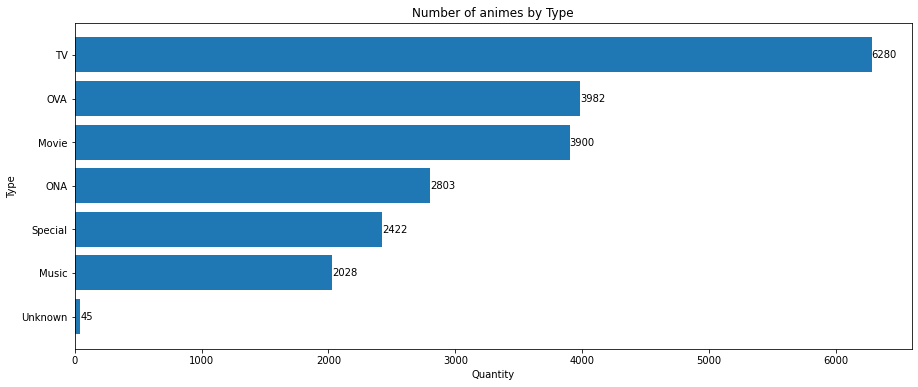

In [106]:
data_df.Type = pd.Categorical(data_df['Type'], categories=['TV', 'OVA', 'Movie', 'ONA', 'Special', 'Music', 'Unknown'])
type_count = data_df.value_counts('Type').rename('Quantity').reset_index()
draw_barh_chart(type_count, 'Type', 'Quantity', 'Number of animes by Type', 'Quantity', 'Type')



Như vậy, số lượng phim hoạt hình thuộc dạng TV chiếm nhiều nhất, tiếp theo là OVA và Movie. Các lý do có thể là:
- TV là dạng dễ sản xuất.
- TV là dạng được yêu thích nhất đối với người xem.
- ...


In [111]:
def weighted_avg(df, col1, col2):
    df = df[~(df[col1].isnull() | df[col2].isnull())]
    if len(df) == 0:
        return np.NaN
    return np.average(df[col1], weights = df[col2])

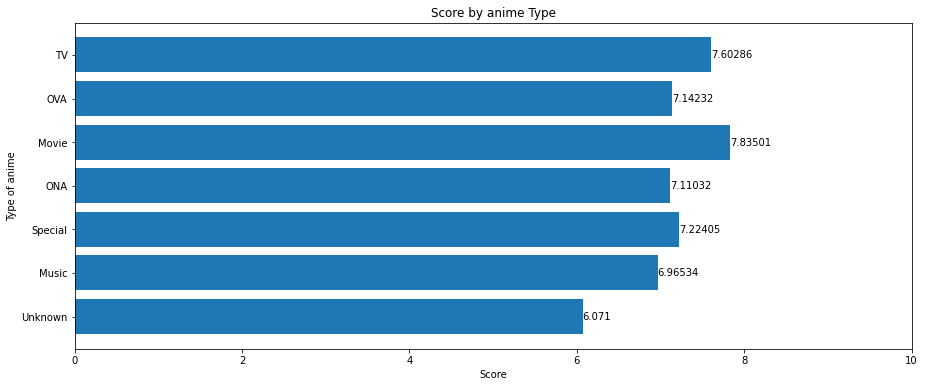

In [112]:
ratings_by_type = data_df.groupby('Type').apply(lambda x: weighted_avg(x, 'Score', 'Scored_Users')).rename('Score').reset_index()
draw_barh_chart(ratings_by_type, 'Type', 'Score', "Score by anime Type", "Score", "Type of anime", (0, 10))

Theo như hình vẽ, ta thấy Movie là dạng được người xem chấm điểm nhiều nhất. Tuy nhiên thì TV là dạng được chấm điểm cao thứ 2 và cách biệt điểm của TV và Movie cũng không nhiều lắm (khoảng 0.23 trên 10), nên cũng có thể khẳng định là người xem đánh giá các chương trình truyền hình hoạt hình có chất lượng tốt.

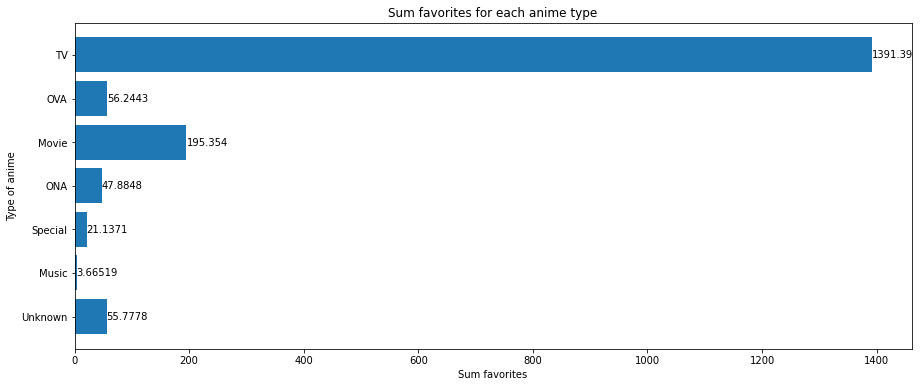

In [114]:
favorites_by_type = data_df.groupby('Type').apply(lambda x: np.sum(x.Favorites) / len(x)).rename('Sum_Favorites').reset_index()
draw_barh_chart(favorites_by_type, 'Type', 'Sum_Favorites', "Sum favorites for each anime type", "Sum favorites", "Type of anime")

Theo như hình vẽ, ta thấy TV là dạng có số lượt yêu thích trên tổng tất cả các phim cao nhất.

heat map cho Premiered